In [1]:
import numpy as np

#### Element-by-element

<font style="font-family: Gill Sans; font-size:1em;color:Firebrick;">Using a normal operation between arrays does element-by-element operation.  For example, matrix multiplication cannot be done using normal multiplication operator.</font>

In [2]:
A = 3 * np.ones((2,2)) #3 is multiplied with every element in the array
B = 6 * np.ones((2,2)) #6 is multiplied with every element in the array
A * B

array([[18., 18.],
       [18., 18.]])

#### Is it matmul or dot?

<font style="font-family: Gill Sans; font-size:1em;color:Firebrick;">Both will give same result for a 2D array, but 3D and above the results are different.  In the case of 2D arrays, matmul should be preferred over dot operation.</font>

In [3]:
np.matmul(A, B)

array([[36., 36.],
       [36., 36.]])

In [4]:
A @ B

array([[36., 36.],
       [36., 36.]])

In [5]:
np.dot(A, B) #same as matrix multiplication for 2 x 2 arrays.

array([[36., 36.],
       [36., 36.]])

<font style="font-family: Gill Sans; font-size:1em;color:Firebrick;">Between matmul and dot, always prefer to use matmul</font>

In [6]:
#matrix multiplication and dot product are not same for higher dimensional arrays (more than 2D)
A = np.random.rand(2,3,3)
B = np.random.rand(2,3,3)
print(np.dot(A, B).shape)
print((A @ B).shape)

(2, 3, 2, 3)
(2, 3, 3)


#### Broadcasting an entire row?

<font style="font-family: Gill Sans; font-size:1em;color:Firebrick;">The entire first (and only) row of A, is entirely broadcast during multiplication operation with B.  This works only since the number of columns in A and B are equal.</font>

In [7]:
A = 3 * np.ones((1,2))
B = 6 *np.ones((3,2))
A * B

array([[18., 18.],
       [18., 18.],
       [18., 18.]])

#### Broadcasting an entire column?

<font style="font-family: Gill Sans; font-size:1em;color:Firebrick;">The entire first (and only) column of A, is entirely broadcast during multiplication operation with B.  This works only since the number of rows in A and B are equal.</font>

In [8]:
A = 3 * np.ones((2,1))
B = 6 *np.ones((2,3))
A * B

array([[18., 18., 18.],
       [18., 18., 18.]])

#### Ok, so, how does this axis parameter work?

<font style="font-family: Gill Sans; font-size:1em;color:Firebrick;">For example, using axis parameter with np.sum, sums up all elements of the array down the column when axis=0, and across row when axis=1</font>

In [9]:
A = np.random.randint(1, 10, size=12).reshape(3,4)
print(A)

[[4 9 2 2]
 [5 1 7 6]
 [1 5 3 8]]


In [10]:
np.sum(A, axis=0) #sums down the column

array([10, 15, 12, 16])

In [11]:
np.sum(A, axis=1) #sums across the row

array([17, 19, 17])

Interesting, huh?

#### Stack or concatentate?

<font style="font-family: Gill Sans; font-size:1em;color:Firebrick;">Both can achieve the same result, but while using concatenate parameter must a tuple, and axis must be specified.  Thus, concatenating along 0th axis stacks vertically, and along 1st axis stacks horizontally.</font>

In [12]:
A = np.ones((2,2))
B = 2*np.ones((2,2))
A_B = np.hstack((A,B))
# A_B = np.concatenate((A, B), axis=1) # same as above
print(A_B)

[[1. 1. 2. 2.]
 [1. 1. 2. 2.]]


In [13]:
C = 3*np.ones((2,2))
D = 4*np.ones((2,2))
C_D = np.hstack((C,D))
# C_D = np.concatenate((C, D), axis=1) # same as above
print(C_D)

[[3. 3. 4. 4.]
 [3. 3. 4. 4.]]


In [14]:
T = np.vstack((A_B,C_D))
# T = np.concatenate((A_B, C_D), axis=0) # same as above
print(T)

[[1. 1. 2. 2.]
 [1. 1. 2. 2.]
 [3. 3. 4. 4.]
 [3. 3. 4. 4.]]


#### So far so good.  How can I generate data?

<font style="font-family: Gill Sans; font-size:1em;color:Firebrick;">Use np.random module</font>

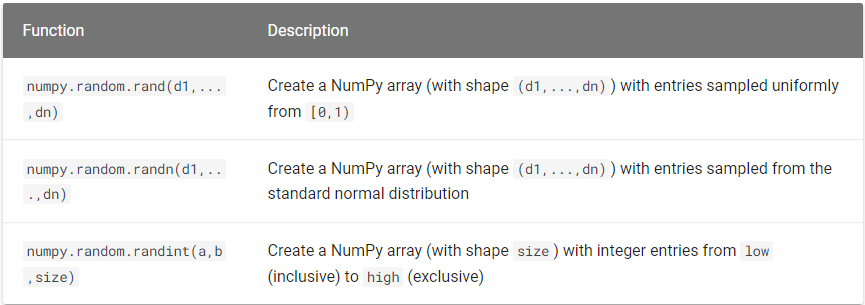

<font style="font-family: Gill Sans; font-size:1em;color:Firebrick;">The first two functions have similar usage...</font>

In [15]:
np.random.rand() # Sample a random number from the uniform distribution

0.7979781400066528

In [16]:
np.random.rand(3) # Sample 3 random numbers from the uniform distribution

array([0.39961515, 0.90879269, 0.34061565])

In [17]:
np.random.rand(2,4) # Create 2D NumPy array of random samples from the uniform distribution

array([[0.57634347, 0.06735085, 0.88387871, 0.70534648],
       [0.07873894, 0.84287142, 0.30219671, 0.75098329]])

In [18]:
np.random.randn() # Sample a random number from the normal distribution

-2.1008876149103046

In [19]:
np.random.randn(3) # Sample 3 random numbers from the normal distribution

array([ 0.76933673, -2.4739615 ,  1.2821192 ])

In [20]:
np.random.randn(2,4) # Create 2D NumPy array of random samples from the normal distribution

array([[ 0.06177456,  0.03652562,  1.34764537,  1.07936564],
       [-0.13041573, -1.54764332,  0.41642805,  0.53757833]])

<font style="font-family: Gill Sans; font-size:1em;color:Firebrick;">...but the last function has a different usage</font>

In [21]:
np.random.randint(-10,10) #One random integer sampled uniformly from given interval

9

In [22]:
np.random.randint(0,2,(4,8))  # 4 x 8 array containing random integers between 0 and 2 (not inclusive)

array([[0, 1, 1, 1, 1, 0, 1, 0],
       [1, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 1]])

#### Can I generate data points separated equally from each other?  Like an arithmetic progression?

<font style="font-family: Gill Sans; font-size:1em;color:Firebrick;">Sure, why not?  Use np.linspace</font>

In [23]:
np.linspace(1,10,20) #Here the last parameter is the number of datapoints needed between 1 and 10.

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

#### What is np.argmax function?  What is it used for?

<font style="font-family: Gill Sans; font-size:1em;color:FIrebrick;">Finds the index of the maximum in a row/column of given array</font>

In [24]:
A = 10 * np.random.random((7, 7))
print(A)

[[4.81830333 3.58933159 6.41391912 7.44447997 2.88868313 6.83748189
  1.81711535]
 [4.19150445 2.35407496 1.00683013 4.35347846 6.9176223  8.263695
  4.33428206]
 [2.19994898 1.44463888 6.01630182 4.58806032 2.32875391 2.52684272
  4.30379444]
 [4.15452643 6.52355292 5.58982981 2.68136514 8.63245381 2.61258591
  9.10542878]
 [4.62784916 7.67280846 2.39408973 2.78209856 8.67947498 0.36594859
  2.25186635]
 [5.86860292 0.84484442 1.69539643 4.21213448 9.7737752  4.76168194
  1.14847884]
 [6.1695584  1.68240375 8.28461779 9.66814888 9.48154235 9.18937905
  1.46925561]]


In [25]:
np.argmax(A) #Flattens the array before returning the index of the max.element.

39

In [26]:
np.argmax(A, axis=0) #Finds index of the max. element down each column.

array([6, 4, 6, 6, 5, 6, 3], dtype=int64)

In [27]:
np.argmax(A, axis=1) #Finds index of the max. element across each row.

array([3, 5, 2, 6, 4, 4, 3], dtype=int64)

<font style="font-family: Gill Sans; font-size:1em;color:Firebrick;">Consider the following code snippet.  What is it doing?</font>

In [28]:
N = 10000
x = np.linspace(0,2*np.pi,N)
y = x * np.sin(x) + np.cos(4*x)

y_max = np.max(y)
y_min = np.min(y)
x_max = x[np.argmax(y)]
x_min = x[np.argmin(y)]

print('Absolute maximum value is y =',y_max,'at x =',x_max)
print('Absolute minimum value is y =',y_min,'at x =',x_min)

Absolute maximum value is y = 2.5992726072887007 at x = 1.628136126702901
Absolute minimum value is y = -5.129752039182 at x = 5.34187001663503


<font style="font-family: Gill Sans; font-size:1em;color:Firebrick;">We know linspace generates 10K equally spaced floats between 0 and $2\pi$

We also saw previously how argmax finds the index that generates the maximum value for the specified parameter.

Since x and y have same index, we can use argmax(y) to index into vector x, and find the x that generates the maximum y.</font>

<font style="font-family: Gill Sans; font-size:1em;color:Firebrick;">Great going so far!</font>